# import

In [2]:
import numpy as np
import pymc3 as pm
from matplotlib import pyplot as plt
from collections import Counter

#MCMCBandit

In [27]:
arms = [[0,0],[0,1],[1,0],[1,1,]]

class MCMC_GLMTSAgent(object):
  def __init__(self):
    self.counts = [0 for _ in arms]
    self.wins = [0 for _ in arms]
    self.phis = np.array([[arm[0],arm[1],1] for arm in arms]).T
  
  def get_arm(self):
    if 0 in self.counts: return self.counts.index(0)
    with pm.Model() as model:
      w = pm.Normal('w', mu=0, sigma=10, shape=3)
      linpred = pm.math.dot(w, self.phis)
      theta = pm.Deterministic(
          'theta', 1 / (1 + pm.math.exp(-linpred)))
      obs = pm.Binomial(
          'obs', n=self.counts, p=theta, observed=self.wins)
      trace = pm.sample(2000, chains=1)
    sample = pm.sample_posterior_predictive(
        trace, samples=1, model=model, var_names=['theta'])
    return np.argmax(sample['theta'])

  def sample(self, arm_index, reward):
    self.counts[arm_index] += 1
    self.wins[arm_index] += reward

In [25]:
class Env(object):
  def p(arm):
    x = arm[0] * 0.2 + arm[1] * 0.8 - 4
    p = 1 / (1 + np.exp(-x))
    return p
  
  def react(arm):
    if np.random.random() < Env.p(arm):
      return 1
    else:
      return 0
  
  def opt():
    return np.argmax([Env.p(arm) for arm in arms])

In [28]:
np.random.seed(0)
selected_arms = []
earned_rewards = []
n_step = 20
agent = MCMC_GLMTSAgent()
for step in range(n_step):
  arm_index = agent.get_arm()
  for _ in range(50):
    reward = Env.react(arms[arm_index])
    agent.sample(arm_index, reward)
    selected_arms.append(arm_index)
    earned_rewards.append(reward)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [w]


Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 4 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:1690: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  raise IncorrectArgumentsError("Should not specify both keep_size and samples arguments")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [w]


Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 4 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
Only one chain was sampled, this makes it impossible to run some convergence checks
/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:1690: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  raise IncorrectArgumentsError("Should not specify both keep_size and samples arguments")


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [w]


Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 5 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
Only one chain was sampled, this makes it impossible to run some convergence checks


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [w]


Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 5 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
Only one chain was sampled, this makes it impossible to run some convergence checks


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [w]


Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [w]


Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [w]


Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [w]


Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 6 seconds.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
Only one chain was sampled, this makes it impossible to run some convergence checks


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [w]


Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [w]


Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 13 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [w]


Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 12 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [w]


Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 13 seconds.
The acceptance probability does not match the target. It is 0.9027725158945206, but should be close to 0.8. Try to increase the number of tuning steps.
Only one chain was sampled, this makes it impossible to run some convergence checks


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [w]


Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 13 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [w]


Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 11 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [w]


Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 7 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
Only one chain was sampled, this makes it impossible to run some convergence checks


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [w]


Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 7 seconds.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
Only one chain was sampled, this makes it impossible to run some convergence checks


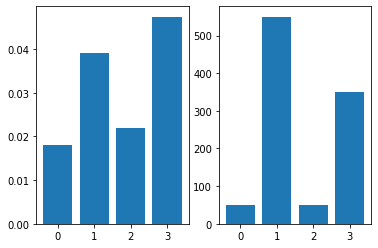

In [37]:
from matplotlib import pyplot as plt
from collections import Counter

arm_count = [row[1] for row in sorted(Counter(selected_arms).items())]
plt.subplot(1,2,1)
plt.bar(range(4), [Env.p(arm) for arm in arms], tick_label=range(4))
plt.subplot(1,2,2)
plt.bar(range(4), arm_count, tick_label=range(4))
#plt.tight_layout(pad=10)
plt.show()

# LinUCBアルゴリズム

In [42]:
class LinUCBAgent(object):
  def __init__(self):
    self.phis = np.array([[arm[0], arm[1], 1] for arm in arms]).T
    self.alpha = 1
    self.sigma = 1
    self.A = np.identity(self.phis.shape[0])
    self.b = np.zeros((self.phis.shape[0], 1))

  def get_arm(self):
    inv_A = np.linalg.inv(self.A)
    mu = inv_A.dot(self.b)
    S = inv_A
    pred_mean = self.phis.T.dot(mu)
    pred_var = self.phis.T.dot(S).dot(self.phis)
    ucb = pred_mean.T + self.alpha * np.sqrt(np.diag(pred_var))
    return np.argmax(ucb)

  def sample(self, arm_index, reward):
    phi = self.phis[:, [arm_index]]
    self.b = self.b + phi * reward / (self.sigma ** 2)
    self.A = self.A + phi.dot(phi.T) / (self.sigma ** 2)

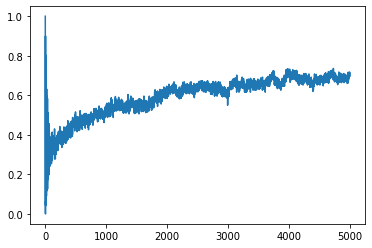

In [45]:
n_iter = 500
n_step = 5000
selected_arms = np.zeros((n_iter, n_step), dtype = int)
earned_rewards = np.zeros((n_iter, n_step), dtype = int)
for it in range(n_iter):
  agent = LinUCBAgent()
  for step in range(n_step):
    arm_index = agent.get_arm()
    reward = Env.react(arms[arm_index])
    agent.sample(arm_index, reward)
    selected_arms[it,step] = arm_index
    earned_rewards[it,step] = reward
plt.plot(np.mean(selected_arms==Env.opt(), axis=0))
plt.show()

# LinUCBアルゴリズム2